In [2]:
import numpy as np
from scipy.optimize import check_grad

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

points = {1: np.array([-2, 0]),
         2: np.array([1, 2]),
         3: np.array([4, 3]),
         4: np.array([4, 3])}


In [108]:
def function(point_number_index):
    sum = 0
    alpha = 5
    for m in range(len(Y)):
        if ((Y[m][1] == 1) or (Y[m][2] == 1)):
            distance = (point_number_index-point[Y[m][2]][0])**2 + (point[Y[m][1]][1]-point[Y[m][2]][1])**2
            sum += np.log(1/(1+np.exp(-Y[m][0]*(alpha-distance))))
    return sum

In [109]:
def grad(point_number_index):
    gradient = 0
    alpha = 5
    for m in range(len(Y)):
        if ((Y[m][1] == 1) or (Y[m][2] == 1)):
            connection = Y[m][0] # Check to see if there is a connection
            distance = (np.linalg.norm(point[Y[m][1]] - point[Y[m][2]]))**2 # Calculate the euclidean distance squared
            point_index_diff = (point_number_index - point[Y[m][2]][0]) # Calculate Points_a,i-Points_b,i
            numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
            denominator = 1 + np.exp(-connection * (alpha - distance)) # Calculate the denominator
            gradient += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together
    return gradient

In [110]:
import numpy as np
from scipy.optimize import check_grad

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

# Test point
mu = np.zeros(2) # Set mean (mu) as a zero vector
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]]) # Set covariance matrix
size = (4, 2)  # Size of the sample (rows, columns)
num_samples = 4 # Number of nodes

In [111]:
# Check gradient
epsilon = 1e-6
point = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
error = check_grad(function, grad, point[1][0])
print("Gradient error:", error)

Gradient error: 4.266845943234898e-08


In [307]:
def gradient_func(point):
    alpha = 5
    gradient = np.zeros_like(point)
    for i in range(1,5):
        for j in range(2):
            for m in range(len(Y)):
                if ((Y[m][1] == i) or (Y[m][2] == i)):
                    norm_diff = np.linalg.norm(point[Y[m][1]] - point[Y[m][2]]) ** 2
                    point_index_diff = (point[2*(i-1)+j] - point[2*(Y[m][1]-1)+j]) + (point[2*(i-1)+j] - point[2*(Y[m][2]-1)+j])
                    exp_term = np.exp(-Y[m][0] * (alpha - norm_diff))
                    factor = -2 * Y[m][0] * point_index_diff * exp_term/(1+exp_term)
                    #print(factor)
                    gradient[2*(i-1)+j] += factor
                    #gradient[2*(i-1)+j] -= factor
    return gradient

In [112]:
hist = np.zeros(10000)
for n in range(10000):
    point = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}
    hist[n] = check_grad(function, grad, point[1][0])

(array([3.395e+03, 2.509e+03, 1.555e+03, 9.170e+02, 5.110e+02, 3.560e+02,
        1.980e+02, 1.450e+02, 1.050e+02, 7.200e+01, 5.000e+01, 4.900e+01,
        2.500e+01, 2.400e+01, 2.700e+01, 1.400e+01, 1.200e+01, 9.000e+00,
        5.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 5.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.46993528e-12, 2.16345059e-08, 4.32675420e-08, 6.49005780e-08,
        8.65336140e-08, 1.08166650e-07, 1.29799686e-07, 1.51432722e-07,
        1.73065758e-07, 1.94698794e-07, 2.16331830e-07, 2.37964866e-07,
        2.59597902e-07, 2.81230938e-07, 3.02863974e-07, 3.24497010e-07,
        3.46130046e-07, 3.67763082e-07, 3.89396118e-07, 4.11029154e-07,
        4.32662190e-07, 4.54295226e-07, 4.75928262e-07, 4.97561298e-07,
        5.19194334e-07, 5.40827370e-07, 5.62460406e-07, 5.84093442e-07,
        6.05726478e-07, 6.27359514e-07, 6.48992550e-07]),
 <BarContainer object of 30 artists>)

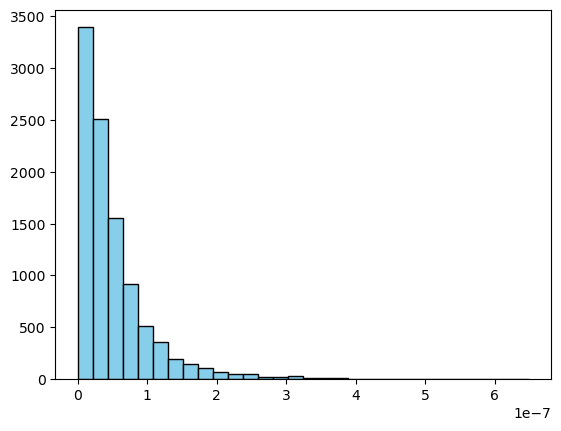

In [113]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')

In [256]:
import autograd.numpy as np
from autograd import grad 
grad_func = grad(function)